## **Create Positional Embedding from Numpy as Pytorch**
* Suppose with have vocab_size and embedd_dim 
$$\text{vocab  size:  Number of vocab in all corpus Documents} $$
$$\text{embedd dim :  Number of dimentions you want with each token after embedidng} $$



### **Create Positional Embedding in Numpy**

In [42]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def plot_positional_encoding(pe_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(pe_matrix[:, :], cmap='coolwarm', xticklabels=5, yticklabels=50)
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Position')
    plt.title('Positional Encoding Heatmap')
    plt.show()
    
max_len = 100
embedd_dim = 512

In [ ]:
a = [[i for i in range(0, embedd_dim, 2)] for pos in range(max_len)]
a

In [22]:
b = [[i for i in range(1, embedd_dim, 2)] for pos in range(max_len)]
b

[[1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7],
 [1, 3, 5, 7]]

##### Cretate position 

In [44]:
pe = np.zeros((max_len, embedd_dim), dtype= np.float32 )
position = np.arange(0, max_len, dtype=np.float32).reshape(max_len,-1)
print(position)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [21.]
 [22.]
 [23.]
 [24.]
 [25.]
 [26.]
 [27.]
 [28.]
 [29.]
 [30.]
 [31.]
 [32.]
 [33.]
 [34.]
 [35.]
 [36.]
 [37.]
 [38.]
 [39.]
 [40.]
 [41.]
 [42.]
 [43.]
 [44.]
 [45.]
 [46.]
 [47.]
 [48.]
 [49.]
 [50.]
 [51.]
 [52.]
 [53.]
 [54.]
 [55.]
 [56.]
 [57.]
 [58.]
 [59.]
 [60.]
 [61.]
 [62.]
 [63.]
 [64.]
 [65.]
 [66.]
 [67.]
 [68.]
 [69.]
 [70.]
 [71.]
 [72.]
 [73.]
 [74.]
 [75.]
 [76.]
 [77.]
 [78.]
 [79.]
 [80.]
 [81.]
 [82.]
 [83.]
 [84.]
 [85.]
 [86.]
 [87.]
 [88.]
 [89.]
 [90.]
 [91.]
 [92.]
 [93.]
 [94.]
 [95.]
 [96.]
 [97.]
 [98.]
 [99.]]


##### Create even position and calculate term div sin position and term div cos position 

In [43]:
even_postion =  np.arange(0, embedd_dim, 2)
even_postion = np.tile(even_postion, (max_len, 1))
print(even_postion)

[[  0   2   4 ... 506 508 510]
 [  0   2   4 ... 506 508 510]
 [  0   2   4 ... 506 508 510]
 ...
 [  0   2   4 ... 506 508 510]
 [  0   2   4 ... 506 508 510]
 [  0   2   4 ... 506 508 510]]


In [45]:
odd_position =  np.arange(1, embedd_dim, 2)
odd_position = np.tile(odd_position, (max_len, 1))
print(odd_position)

[[  1   3   5 ... 507 509 511]
 [  1   3   5 ... 507 509 511]
 [  1   3   5 ... 507 509 511]
 ...
 [  1   3   5 ... 507 509 511]
 [  1   3   5 ... 507 509 511]
 [  1   3   5 ... 507 509 511]]


In [46]:
term_div_sin = np.sin(position / (np.power(10000,even_postion / embedd_dim)))
term_div_cos = np.cos(position / (np.power(10000,odd_position / embedd_dim)))

print(f'term_div_sin shape: {term_div_sin.shape}')
print(f'term_div_cos shape: {term_div_cos.shape}')

print(f'term_div_sin:\n {term_div_sin}')
print(f'term_div_cos:\n {term_div_cos}')

term_div_sin shape: (100, 256)
term_div_cos shape: (100, 256)
term_div_sin:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.41470985e-01  8.21856190e-01  8.01961795e-01 ...  1.11397386e-04
   1.07460783e-04  1.03663293e-04]
 [ 9.09297427e-01  9.36414739e-01  9.58144376e-01 ...  2.22794770e-04
   2.14921564e-04  2.07326584e-04]
 ...
 [ 3.79607739e-01 -6.25367561e-01  7.45109484e-01 ...  1.08053362e-02
   1.04235072e-02  1.00551700e-02]
 [-5.73381872e-01  2.85050529e-01 -8.97521193e-02 ...  1.09167270e-02
   1.05309621e-02  1.01588280e-02]
 [-9.99206834e-01  9.50151288e-01 -8.52340887e-01 ...  1.10281177e-02
   1.06384168e-02  1.02624858e-02]]
term_div_cos:
 [[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 0.55521749  0.58374442  0.61059733 ...  0.99999999  0.99999999
   0.99999999]
 [-0.38346709 -0.3184849  -0.25434181 ...  0.99999998  0.99999998
   0.99999998]
 ...
 [ 0.52089807 -0.69830108  0.770

##### Broadcasting and Copy term div sin position and term div cos postion to Position Encoding

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470957e-01  5.55217505e-01  8.21856201e-01 ...  1.00000000e+00
   1.03663289e-04  1.00000000e+00]
 [ 9.09297407e-01 -3.83467078e-01  9.36414719e-01 ...  1.00000000e+00
   2.07326579e-04  1.00000000e+00]
 ...
 [ 3.79607737e-01  5.20898044e-01 -6.25367582e-01 ...  9.99947608e-01
   1.00551704e-02  9.99951243e-01]
 [-5.73381901e-01 -4.20747548e-01  2.85050541e-01 ...  9.99946535e-01
   1.01588275e-02  9.99950230e-01]
 [-9.99206841e-01 -9.88110840e-01  9.50151265e-01 ...  9.99945402e-01
   1.02624856e-02  9.99949217e-01]]


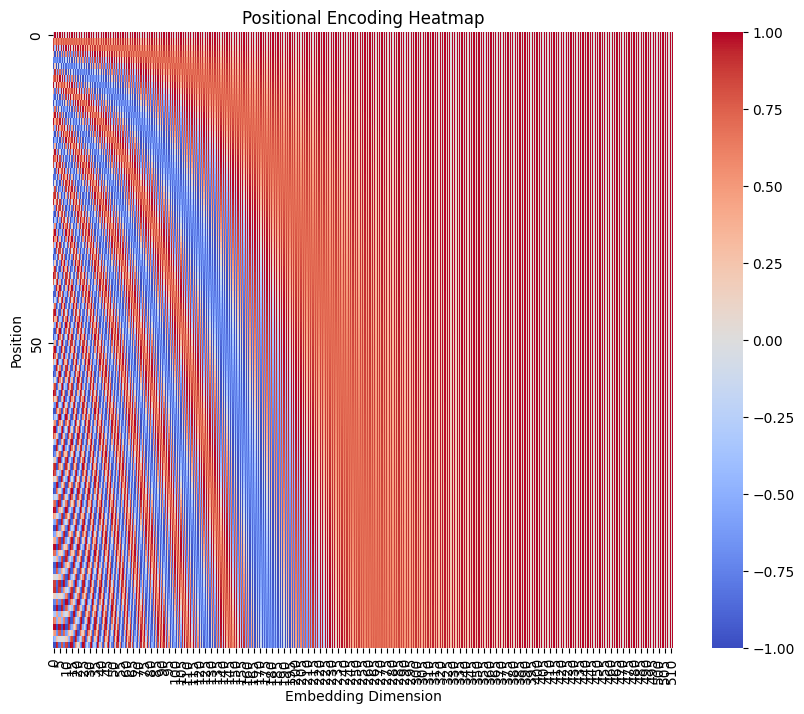

In [47]:
pe[:, 0::2] = term_div_sin
pe[:, 1::2] = term_div_cos

print(pe)
plot_positional_encoding(pe)

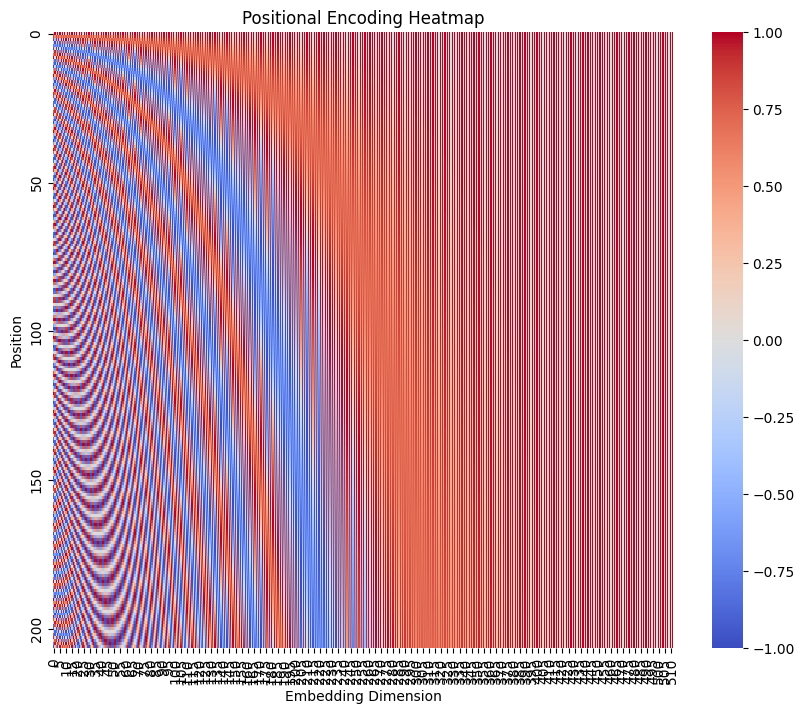

In [49]:
def position_encoding(max_len =5000, embedd_dim = 512):
    pe = np.zeros((max_len, embedd_dim), dtype= np.float32 )
    position = np.arange(0, max_len, dtype=np.float32).reshape(max_len,-1)
    even_postion =  np.tile(np.arange(0, embedd_dim, 2), (max_len, 1))
    odd_postion =  np.tile(np.arange(1, embedd_dim, 2), (max_len, 1))

    term_div_sin = np.sin(position / (np.power(10000,even_postion / embedd_dim)))
    term_div_cos = np.cos(position / (np.power(10000,odd_postion / embedd_dim)))

    pe[:, 0::2] =  term_div_sin
    pe[:, 1::2] =  term_div_cos

    return pe
plot_positional_encoding(position_encoding(207, 512))

### **Create Positional Embedding in Numpy**

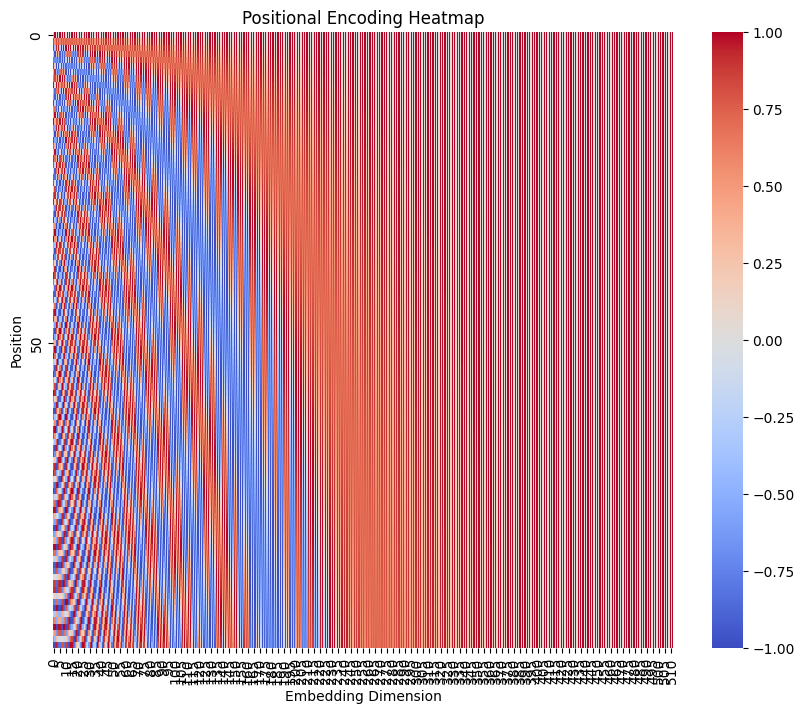

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn 

class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term_sin = torch.exp(torch.arange(0, embed_dim, 2).float() * (-torch.log(torch.tensor(10000.0)) / embed_dim))
        div_term_cos = torch.exp(torch.arange(1, embed_dim, 2).float() * (-torch.log(torch.tensor(10000.0)) / embed_dim))

        pe[:, 0::2] = torch.sin(position * div_term_sin)
        pe[:, 1::2] = torch.cos(position * div_term_cos)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

def plot_positional_encoding(pe_matrix, embed_dim):
    plt.figure(figsize=(10, 8))
    sns.heatmap(pe_matrix[:, :embed_dim].numpy(), cmap='coolwarm', xticklabels=5, yticklabels=50)
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Position')
    plt.title('Positional Encoding Heatmap')
    plt.show()

embed_dim = 512
max_len = max_len
pos_enc = PositionalEncoding(embed_dim, max_len)

pe_matrix = pos_enc.pe.squeeze(1)

plot_positional_encoding(pe_matrix, embed_dim, max_len)

In [114]:
print(pe)

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  9.5042e-01,  9.9833e-02,  9.9950e-01,  9.9998e-03,
          9.9999e-01,  1.0000e-03,  1.0000e+00],
        [ 9.0930e-01,  8.0658e-01,  1.9867e-01,  9.9800e-01,  1.9999e-02,
          9.9998e-01,  2.0000e-03,  1.0000e+00],
        [ 1.4112e-01,  5.8275e-01,  2.9552e-01,  9.9550e-01,  2.9995e-02,
          9.9995e-01,  3.0000e-03,  1.0000e+00],
        [-7.5680e-01,  3.0114e-01,  3.8942e-01,  9.9201e-01,  3.9989e-02,
          9.9992e-01,  4.0000e-03,  1.0000e+00],
        [-9.5892e-01, -1.0342e-02,  4.7943e-01,  9.8753e-01,  4.9979e-02,
          9.9988e-01,  5.0000e-03,  1.0000e+00],
        [-2.7942e-01, -3.2080e-01,  5.6464e-01,  9.8205e-01,  5.9964e-02,
          9.9982e-01,  6.0000e-03,  1.0000e+00],
        [ 6.5699e-01, -5.9944e-01,  6.4422e-01,  9.7560e-01,  6.9943e-02,
          9.9976e-01,  6.9999e-03,  1.0000e+00],
        [ 9.8936